# **Classification with a single-layer perceptron**

### 1. Generation of linearly-separable data


In [1]:
import numpy as np

n = 100
mA = [ 3, 1.5]
sigmaA = 0.3
mB = [0.5, 0.3]
sigmaB = 0.3
classA = np.ones((3,n))
classB = -np.ones((3,n))
classA [0, :] = np.random.randn(n) * sigmaA + mA[0]
classA [1, :] = np.random.randn(n) * sigmaA + mA[1]
classB [0, :] = np.random.randn(n) * sigmaB + mB[0]
classB [1, :] = np.random.randn(n) * sigmaB + mB[1]
patterns = np.concatenate((classA, classB), axis=1)
np.random.shuffle(patterns.T)
targets=patterns[2,:].copy()
patterns[2,:]=1


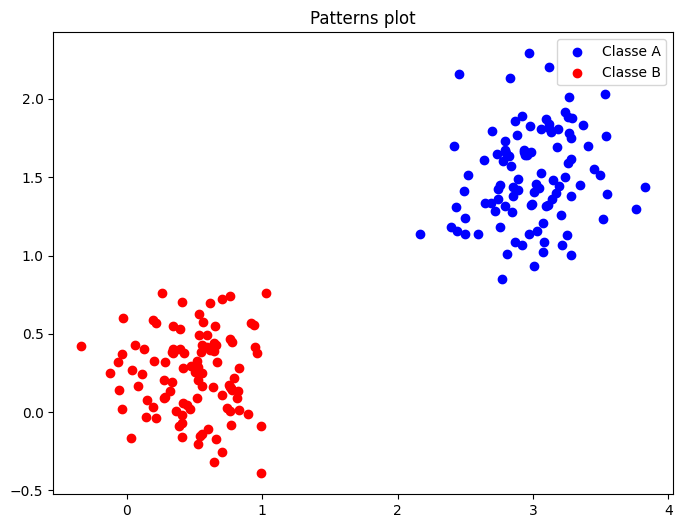

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(patterns[0,targets==1],patterns[1,targets==1],color="blue",label="Classe A")
plt.scatter(patterns[0,targets==-1],patterns[1,targets==-1],color="red",label="Classe B")
plt.legend()
plt.title("Patterns plot")
plt.show()



### 2. Classification with a single-layer perceptron and analysis

1] Apply and compare perceptron learning with the delta learning rule in
online (sequential) mode on the generated dataset. Adjust the learning
rate and study the convergence of the two algorithms.

In [3]:
# Initialisation weight 
W = np.ones(3)
W[:2] = np.random.rand(2) 

Perceptron Learning rule : 



In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


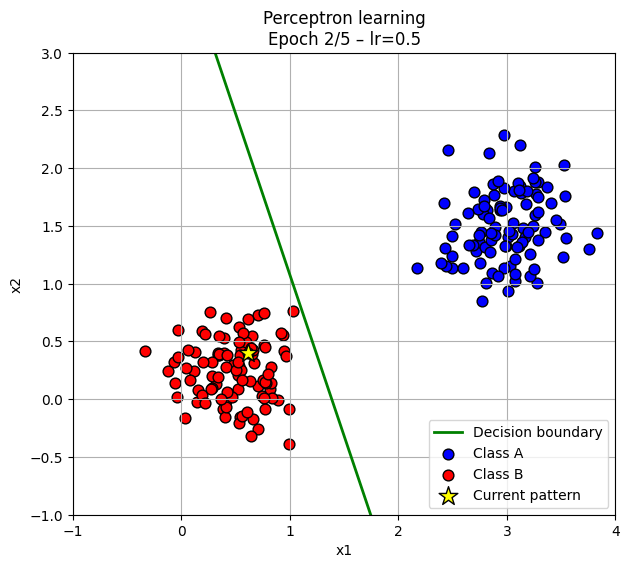

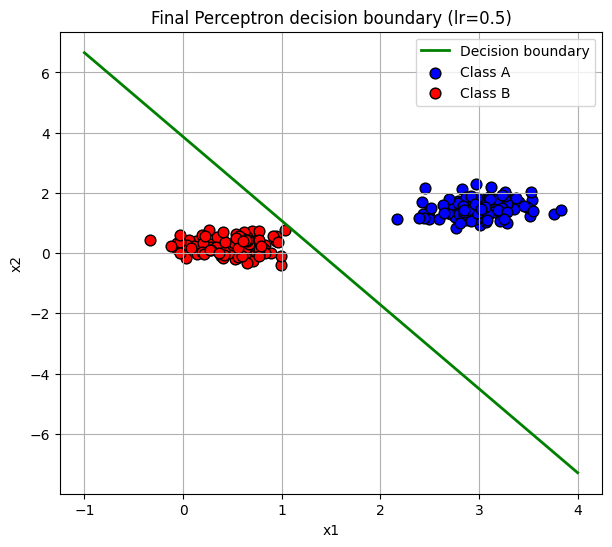

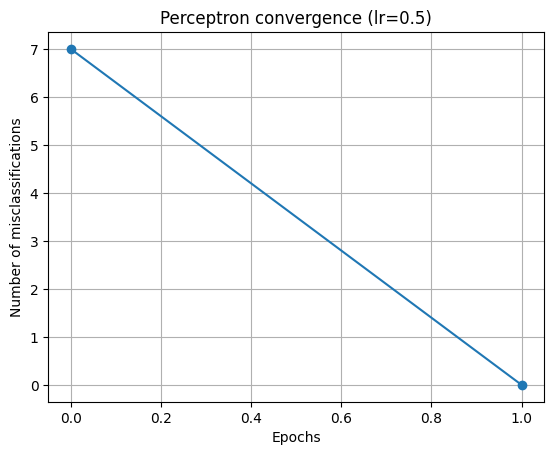

([7, 0], array([ 1.08237019,  0.38800292, -1.5       ]))

In [5]:
def perceptron_seq(
    patterns,targets,W_init, lr, max_epochs,
    bool_plot=False, bool_plot_animation=False,
    tol=0
):

    W = W_init.copy()
    errors_epochs = []

    for j in range(max_epochs):
        errors_epoch = 0

        for i in range(patterns.shape[1]):

            X = patterns[:, i]
            d = W.T @ X

            if targets[i] < 0 and d > 0:
                W -= lr * X
                errors_epoch += 1

            elif targets[i] > 0 and d < 0:
                W += lr * X
                errors_epoch += 1

            if bool_plot_animation:
                clear_output(wait=True)

                x = np.linspace(-1, 4, 1000)
                y_line = -(W[0]*x + W[2]) / W[1]

                plt.figure(figsize=(7, 6))
                plt.plot(x, y_line, 'g-', linewidth=2,
                         label='Decision boundary')

                plt.scatter(patterns[0, targets==1],
                            patterns[1, targets==1],
                            color='blue', edgecolors='black',
                            s=60, label='Class A')

                plt.scatter(patterns[0, targets==-1],
                            patterns[1, targets==-1],
                            color='red', edgecolors='black',
                            s=60, label='Class B')

                plt.scatter(patterns[0, i], patterns[1, i],
                            color='yellow', marker='*', s=200,
                            edgecolors='black',
                            label='Current pattern')

                plt.title(
                    f'Perceptron learning\n'
                    f'Epoch {j+1}/{max_epochs} – lr={lr}'
                )
                plt.xlabel('x1')
                plt.ylabel('x2')
                plt.legend()
                plt.xlim(-1, 4)
                plt.ylim(-1, 3)
                plt.grid(True)
                plt.show()

                time.sleep(0.01)

        errors_epochs.append(errors_epoch)

        if errors_epoch <= tol:
            break

    if bool_plot:
        x = np.linspace(-1, 4, 1000)
        y_line = -(W[0]*x + W[2]) / W[1]

        plt.figure(figsize=(7, 6))
        plt.plot(x, y_line, 'g-', linewidth=2,
                 label='Decision boundary')

        plt.scatter(patterns[0, targets==1],
                    patterns[1, targets==1],
                    color='blue', edgecolors='black',
                    s=60, label='Class A')

        plt.scatter(patterns[0, targets==-1],
                    patterns[1, targets==-1],
                    color='red', edgecolors='black',
                    s=60, label='Class B')

        plt.title(f'Final Perceptron decision boundary (lr={lr})')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.plot(errors_epochs, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of misclassifications')
        plt.title(f'Perceptron convergence (lr={lr})')
        plt.grid(True)
        plt.show()

    return errors_epochs, W

perceptron_seq(
    patterns,targets,W, 0.5, 5,
    bool_plot=True , bool_plot_animation=True,
    tol=0
)

Learning Rate

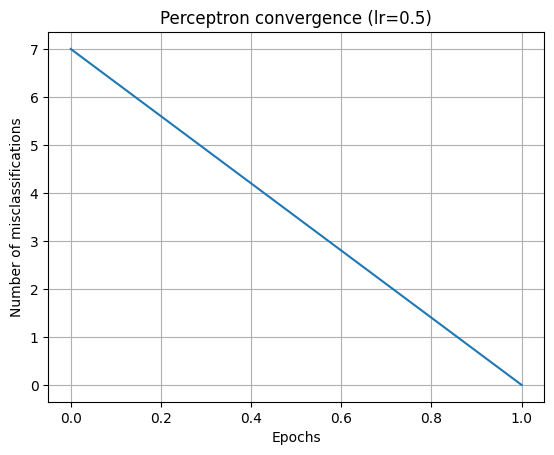

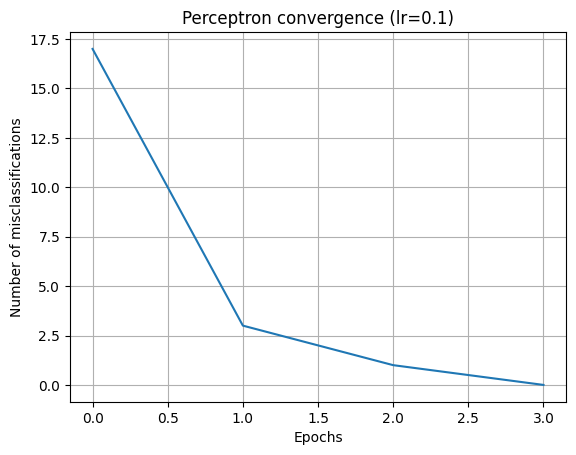

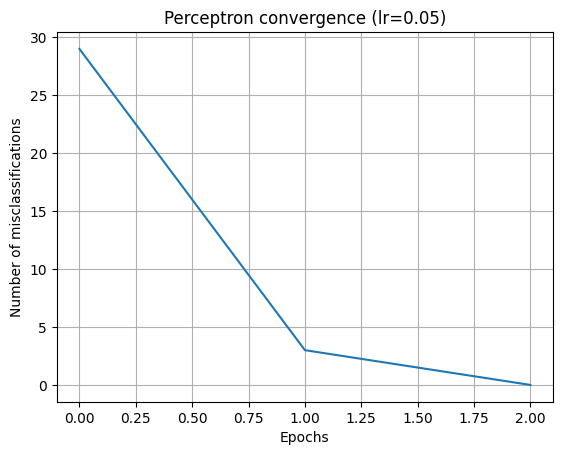

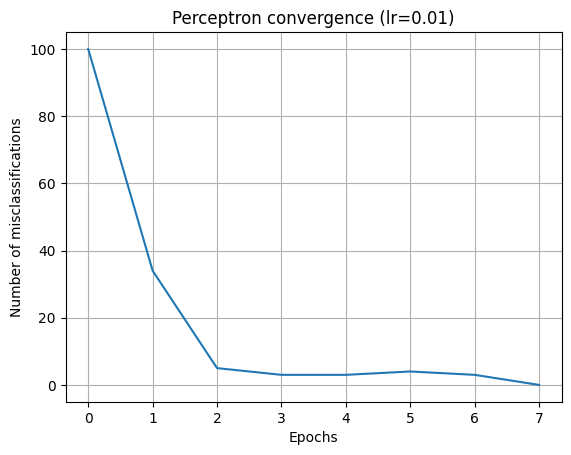

In [6]:
# until convergence 
L=[0.5,0.1,0.05,0.01]
max_epochs=10
tol=0
for l in (L):
    Errors,_=perceptron_seq(patterns,targets,W,l,max_epochs,False,False,0)
    plt.figure()
    plt.plot(Errors)
    plt.xlabel('Epochs')
    plt.ylabel('Number of misclassifications')
    plt.title(f'Perceptron convergence (lr={l})')
    plt.grid(True)
    plt.show()

    


Delta Learning rule :

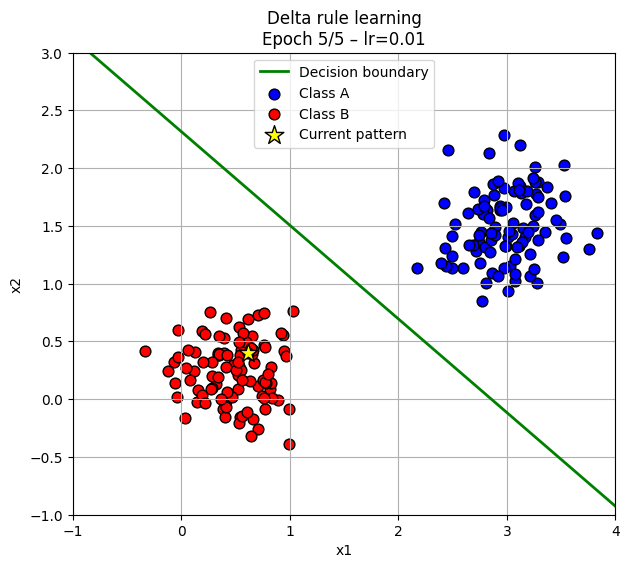

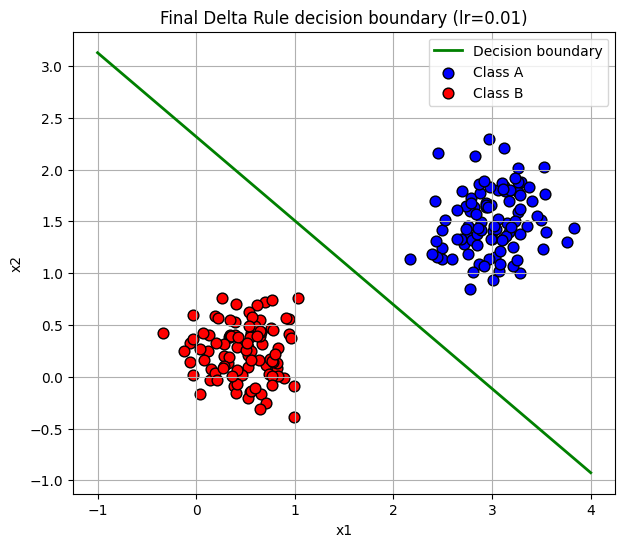

([np.float64(1.1272771836139979),
  np.float64(0.29222615858367773),
  np.float64(0.1233819447878034),
  np.float64(0.07374199920775217),
  np.float64(0.058164747491603795)],
 array([ 0.43740613,  0.53952853, -1.2498344 ]))

In [7]:

def delta_seq(
    W_init, lr, max_epochs,
    bool_plot=True, bool_plot_animation=False,
    tol=0.01
):

    W = W_init.copy()
    MSE_epochs = []
    epoch = 1
    mse = float('inf')

    while mse >tol and epoch <= max_epochs:
        errors = []

        for i in range(patterns.shape[1]):

            X = patterns[:, i]
            y = W.T @ X
            e = targets[i] - y
            W += lr * e * X
            errors.append(e)

            if bool_plot_animation:
                clear_output(wait=True)

                x = np.linspace(-1, 4, 1000)
                y_line = -(W[0]*x + W[2]) / W[1]

                plt.figure(figsize=(7, 6))
                plt.plot(x, y_line, 'g-', linewidth=2,
                         label='Decision boundary')

                plt.scatter(patterns[0, targets==1],
                            patterns[1, targets==1],
                            color='blue', edgecolors='black',
                            s=60, label='Class A')

                plt.scatter(patterns[0, targets==-1],
                            patterns[1, targets==-1],
                            color='red', edgecolors='black',
                            s=60, label='Class B')

                plt.scatter(patterns[0, i], patterns[1, i],
                            color='yellow', marker='*', s=200,
                            edgecolors='black',
                            label='Current pattern')

                plt.title(
                    f'Delta rule learning\n'
                    f'Epoch {epoch}/{max_epochs} – lr={lr}'
                )
                plt.xlabel('x1')
                plt.ylabel('x2')
                plt.legend()
                plt.xlim(-1, 4)
                plt.ylim(-1, 3)
                plt.grid(True)
                plt.show()

                time.sleep(0.01)

        mse = np.mean(np.array(errors) ** 2)
        MSE_epochs.append(mse)
        epoch += 1

    if bool_plot:
        x = np.linspace(-1, 4, 1000)
        y_line = -(W[0]*x + W[2]) / W[1]

        plt.figure(figsize=(7, 6))
        plt.plot(x, y_line, 'g-', linewidth=2,
                 label='Decision boundary')

        plt.scatter(patterns[0, targets==1],
                    patterns[1, targets==1],
                    color='blue', edgecolors='black',
                    s=60, label='Class A')

        plt.scatter(patterns[0, targets==-1],
                    patterns[1, targets==-1],
                    color='red', edgecolors='black',
                    s=60, label='Class B')

        plt.title(f'Final Delta Rule decision boundary (lr={lr})')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.grid(True)
        plt.show()

    return MSE_epochs, W


delta_seq(W, 0.01, 5, bool_plot=True, bool_plot_animation=True,tol=0.01)

Power of the learning rate

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_15389/781659943.py:62: RuntimeWarning: overflow encountered in square
  mse = np.mean(np.array(errors) ** 2)
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_15389/781659943.py:20: RuntimeWarning: overflow encountered in multiply
  W += lr * e * X
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_15389/781659943.py:20: RuntimeWarning: invalid value encountered in add
  W += lr * e * X


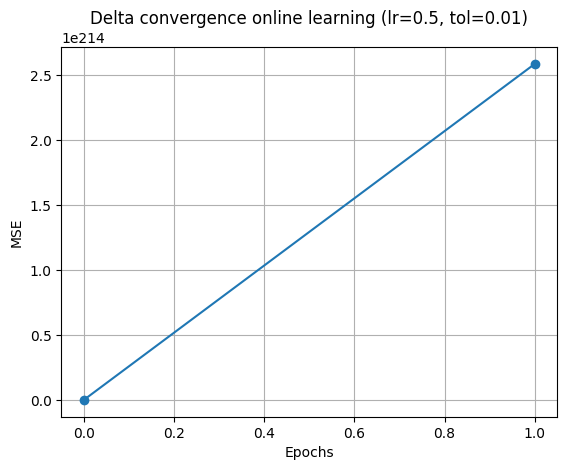

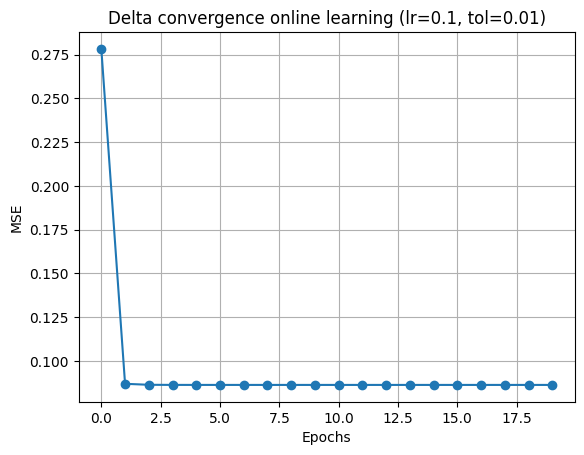

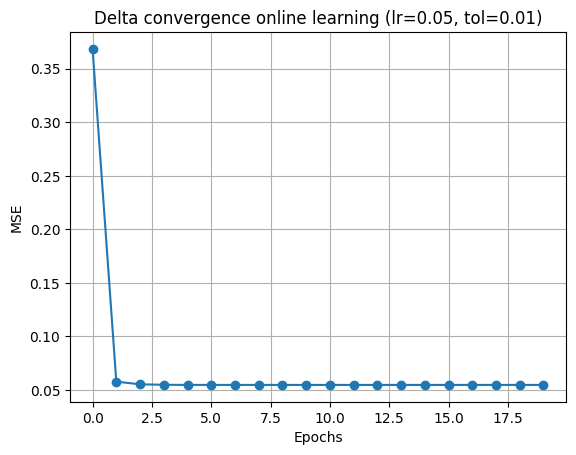

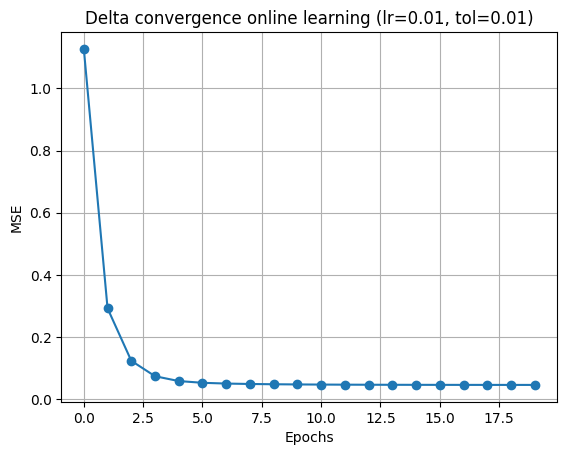

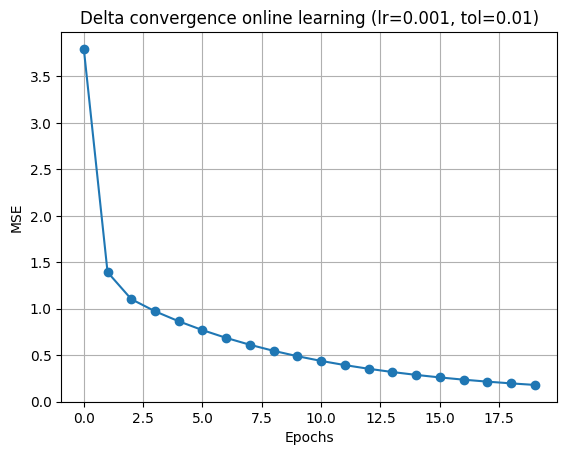

In [8]:
L = [0.5, 0.1, 0.05, 0.01,0.001]
max_epochs = 20
tol = 0.01

for l in L:
    Errors, _ = delta_seq(
        W, l, max_epochs,
        bool_plot=False,
        bool_plot_animation=False,
        tol=tol
    )

    plt.figure()
    plt.plot(Errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title(f'Delta convergence online learning (lr={l}, tol={tol})')
    plt.grid(True)
    plt.show()


2. Compare sequential with a batch learning approach for the delta rule. How
quickly (in terms of epochs) do the algorithms converge? Please adjust the
learning rate and plot the learning curves for each variant. Bear in mind
that for sequential learning you should not use the matrix form of the lear-
ning rule discussed in section 2.2 and instead perform updates iteratively
for each sample. How sensitive is learning to random initialisation?

Batch delta rule

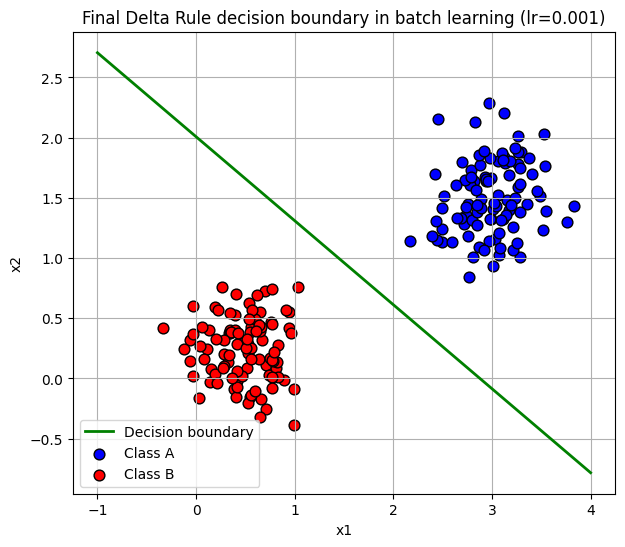

([np.float64(8.287170849666651),
  np.float64(1.9363359035648307),
  np.float64(1.2084059075180715),
  np.float64(1.0220467757314657),
  np.float64(0.9006689399820871),
  np.float64(0.798001818977726),
  np.float64(0.7081806214034525),
  np.float64(0.6293029491852022),
  np.float64(0.560002006940964),
  np.float64(0.4991063158152784),
  np.float64(0.44559017364262893),
  np.float64(0.39855344078354044),
  np.float64(0.357205970141342),
  np.float64(0.3208541432774939),
  np.float64(0.2888890711603959),
  np.float64(0.26077623888846513),
  np.float64(0.23604641628292544),
  np.float64(0.21428767947129937),
  np.float64(0.19513840764974147),
  np.float64(0.1782811358256387),
  np.float64(0.16343715891299632),
  np.float64(0.150361795342084),
  np.float64(0.1388402295704474),
  np.float64(0.12868386273587595),
  np.float64(0.11972710934098622),
  np.float64(0.11182458545095018),
  np.float64(0.1048486405497988),
  np.float64(0.09868719105008396),
  np.float64(0.0932418185850557),
  np.flo

In [9]:

def delta_batch(
    patterns,targets,W_init, lr, max_epochs,
    bool_plot=True,
    tol=0.01
):

    W = W_init.copy()
    MSE_epochs = []
    epoch = 1
    mse = float('inf')

    while mse >tol and epoch <= max_epochs:


        X = patterns
        Y = W @ X
        errors = targets - Y
        W += lr * errors @ X.T

            
        mse = np.mean(np.array(errors) ** 2)
        MSE_epochs.append(mse)
        epoch += 1

    if bool_plot:
        x = np.linspace(-1, 4, 1000)
        y_line = -(W[0]*x + W[2]) / W[1]

        plt.figure(figsize=(7, 6))
        plt.plot(x, y_line, 'g-', linewidth=2,
                 label='Decision boundary')

        plt.scatter(patterns[0, targets==1],
                    patterns[1, targets==1],
                    color='blue', edgecolors='black',
                    s=60, label='Class A')

        plt.scatter(patterns[0, targets==-1],
                    patterns[1, targets==-1],
                    color='red', edgecolors='black',
                    s=60, label='Class B')

        plt.title(f'Final Delta Rule decision boundary in batch learning (lr={lr})')
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend()
        plt.grid(True)
        plt.show()

    return MSE_epochs, W


delta_batch(patterns,targets,W, 0.001, 40, bool_plot=True,tol=0.01)

Learning rate

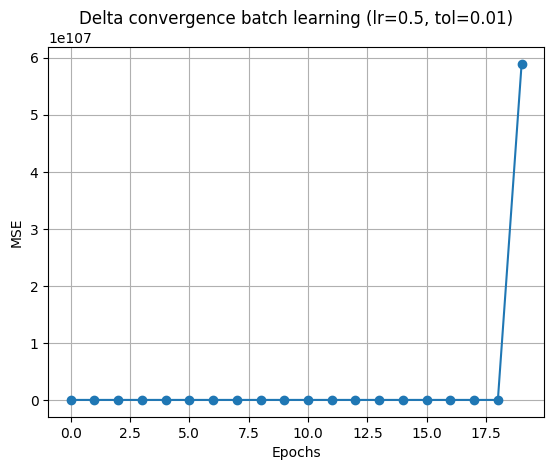

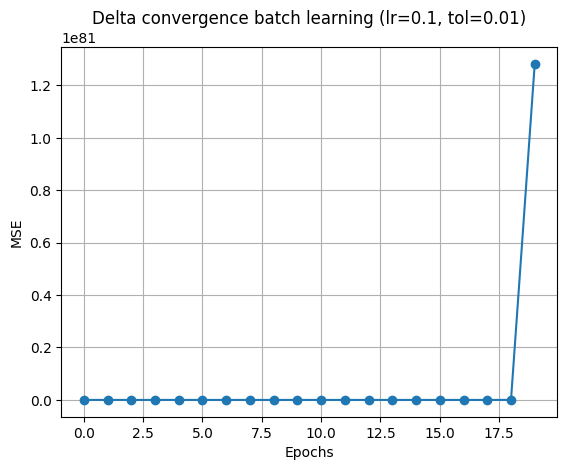

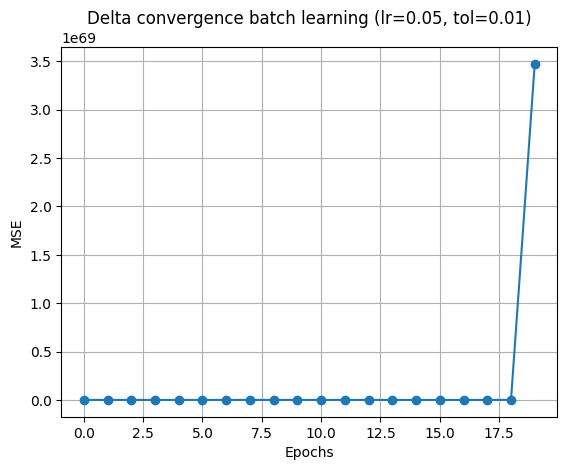

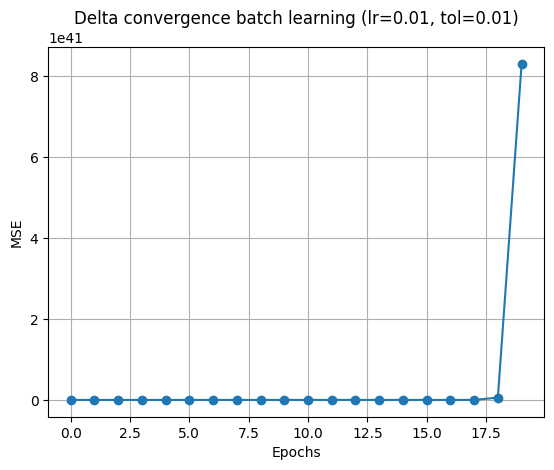

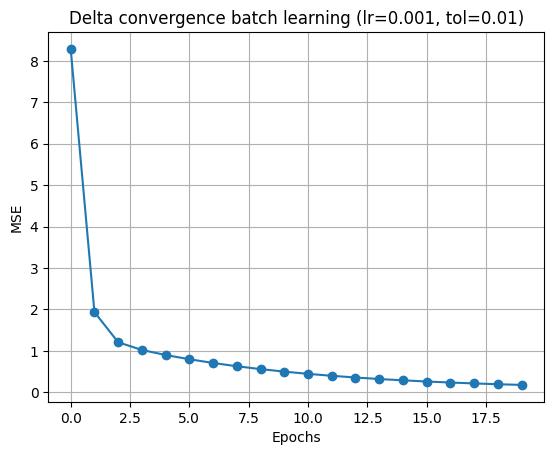

In [10]:
L = [0.5, 0.1, 0.05, 0.01,0.001]
max_epochs = 20
tol = 0.01

for l in L:
    Errors, _ = delta_batch(patterns,targets,
        W, l, max_epochs,
        bool_plot=False,

        tol=tol
    )

    plt.figure()
    plt.plot(Errors, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title(f'Delta convergence batch learning (lr={l}, tol={tol})')
    plt.grid(True)
    plt.show()


Initialisation of different weights

In [11]:
L_w=[]
nb_initialisation=5
for i in range(nb_initialisation):
    new_W= np.ones(3)
    new_W[:2] = np.random.rand(2) 
    L_w.append(new_W)

Delta Batch Learning with diffents initialisation

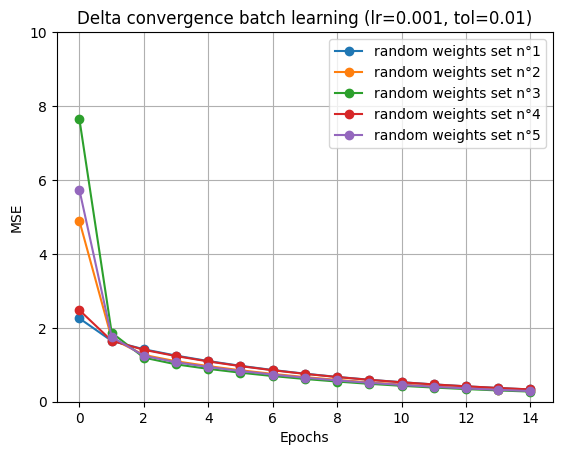

In [12]:
max_epochs = 15
tol = 0.01
lr=0.001
i=0
all_final_W_batch=[]
for w in L_w:
    i+=1
    Errors, final_W= delta_batch(
        patterns,targets,w, lr, max_epochs,
        bool_plot=False,
        tol=tol
    )
    all_final_W_batch.append(final_W)
    plt.plot(Errors, marker='o',label=f'random weights set n°{i}')
    plt.xlabel('Epochs')
    plt.ylim(0,10)
    plt.ylabel('MSE')
    plt.grid(True)

plt.legend()
plt.title(f'Delta convergence batch learning (lr={lr}, tol={tol})')
plt.show()

all_final_W_batch = np.array(all_final_W_batch)


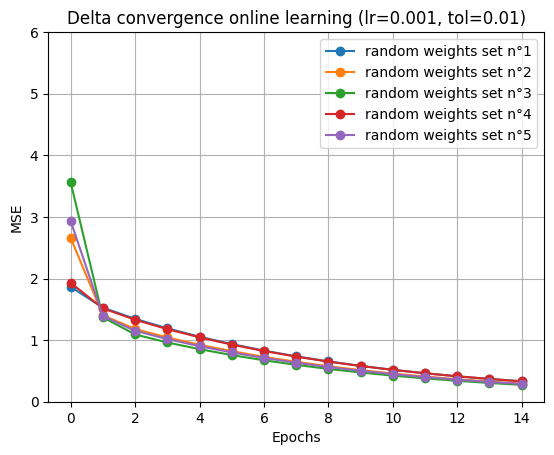

In [13]:
max_epochs = 15
tol = 0.01
lr=0.001
i=0
all_final_W_seq=[]

for w in L_w:
    i+=1
    Errors,final_w = delta_seq(
        w, lr, max_epochs,
        bool_plot=False,
        bool_plot_animation=False,
        tol=tol
    )

    all_final_W_seq.append(final_w)

    plt.plot(Errors, marker='o',label=f'random weights set n°{i}')
    plt.xlabel('Epochs')
    plt.ylim(0,6)
    plt.ylabel('MSE')
    plt.grid(True)

plt.legend()
plt.title(f'Delta convergence online learning (lr={lr}, tol={tol})')
plt.show()

all_final_W_seq = np.array(all_final_W_seq)


In [14]:

print("Variance final weights (batch):", np.var(all_final_W_batch, axis=0))
print("Variance final weights (sequential):", np.var(all_final_W_seq, axis=0))


Variance final weights (batch): [0.00499559 0.01567414 0.00120176]
Variance final weights (sequential): [0.00501138 0.01572337 0.00126285]


3. Remove the bias, train your network with the delta rule in batch mode and test its behaviour. In what cases would the perceptron without
bias converge and classify correctly all data samples? Please verify your
hypothesis by adjusting data parameters, mA and mB.

In [27]:
L_w_no_b=[]
nb_initialisation=5
for i in range(nb_initialisation):
    new_W= np.random.rand(2) 
    L_w_no_b.append(new_W)

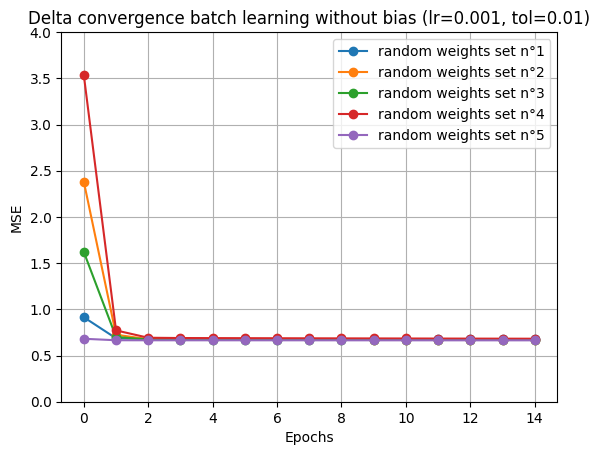

In [16]:
patterns_no_b=patterns[:2,:]

max_epochs = 15
tol = 0.01
lr=0.001
i=0
all_final_W_batch=[]
for w in L_w_no_b:
    i+=1
    Errors, final_W= delta_batch(
        patterns_no_b,targets,w, lr, max_epochs,
        bool_plot=False,
        tol=tol
    )
    all_final_W_batch.append(final_W)
    plt.plot(Errors, marker='o',label=f'random weights set n°{i}')
    plt.xlabel('Epochs')
    plt.ylim(0,4)
    plt.ylabel('MSE')
    plt.grid(True)

plt.legend()
plt.title(f'Delta convergence batch learning without bias (lr={lr}, tol={tol})')
plt.show()

all_final_W_batch = np.array(all_final_W_batch)



In [17]:
print("Variance final weights (batch):", np.var(all_final_W_batch, axis=0))


Variance final weights (batch): [0.00290311 0.01145655]


Perceptron works without biais only if the sets of points are separable by a line that go through the origin 

Verification:

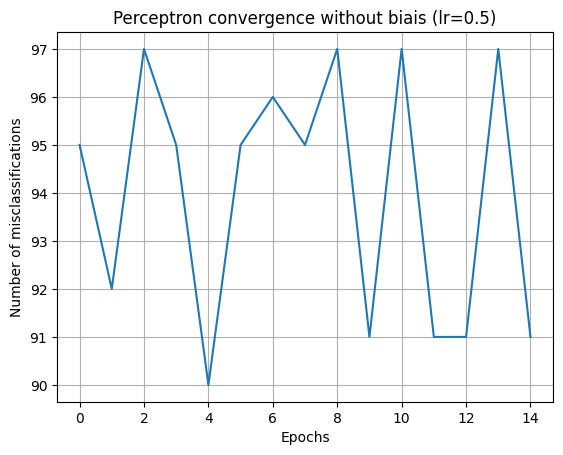

In [33]:
# no biais with the same mA and Mb as before
max_epochs=15
tol=0
lr=0.5
w_no_b=L_w_no_b[0]

Errors,_=perceptron_seq(patterns_no_b,targets,w_no_b,lr,max_epochs,False,False,0)
plt.figure()
plt.plot(Errors)
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title(f'Perceptron convergence without biais (lr={lr})')
plt.grid(True)
plt.show()

    

In [34]:
# change of mA and mB
n = 100
mC= [ 2.5, 1.5]
sigmaC = 0.3
mD = [-3, -2]
sigmaD = 0.3
classC = np.ones((3,n))
classD = -np.ones((3,n))
classC [0, :] = np.random.randn(n) * sigmaC + mC[0]
classC [1, :] = np.random.randn(n) * sigmaC+ mC[1]
classD [0, :] = np.random.randn(n) * sigmaD + mD[0]
classD [1, :] = np.random.randn(n) * sigmaD + mD[1]
new_patterns = np.concatenate((classC, classD), axis=1)
np.random.shuffle(new_patterns.T)
new_targets=new_patterns[2,:].copy()
new_patterns=new_patterns[:-1,:]



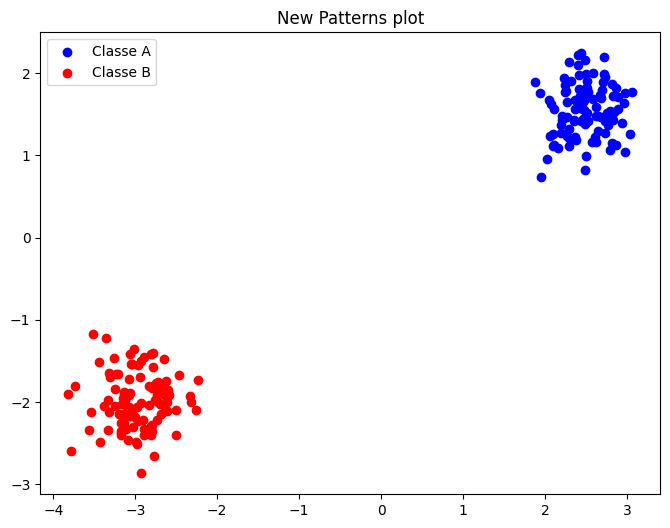

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(new_patterns[0,new_targets==1],new_patterns[1,new_targets==1],color="blue",label="Classe A")
plt.scatter(new_patterns[0,new_targets==-1],new_patterns[1,new_targets==-1],color="red",label="Classe B")
plt.legend()
plt.title("New Patterns plot")
plt.show()

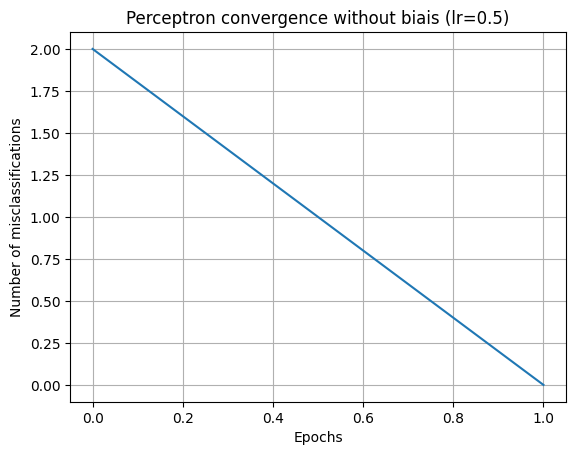

In [41]:
# no biais with the centered mA and Mb as before
max_epochs=15
tol=0
lr=0.5
w_no_b=np.array([-3.0,1.0])

Errors,_=perceptron_seq(new_patterns,new_targets,w_no_b,lr,max_epochs,False,False,0)
plt.figure()
plt.plot(Errors)
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title(f'Perceptron convergence without biais (lr={lr})')
plt.grid(True)
plt.show()